## K-means Clustering
Estimated time needed: 25 minutes

Objectives
After completing this lab you will be able to:

Use scikit-learn's k-means clustering to cluster data
Apply k-means clustering on a real world data for Customer segmentation
Introduction
K-means is vastly used for clustering in many data science applications. It is especially useful if you need to quickly discover insights from unlabeled data.

Real-world applications of k-means include:

Customer segmentation
Understanding what website visitors are trying to accomplish
Pattern recognition
Feature engineering
Data compression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import plotly.express as px

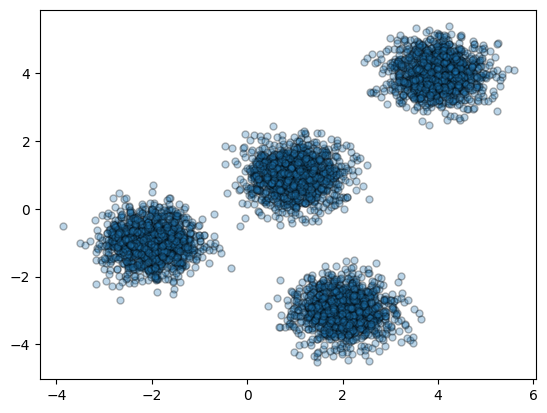

In [43]:
np.random.seed(0)

X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2,-1], [2,-3], [1,1]], cluster_std=0.5)

plt.scatter(X[:, 0], X[:, 1], marker='.', alpha=0.3, ec='k', s=100)

## Setting up k-means

In [44]:
kmeans = KMeans(init="k-means++", n_clusters=4, n_init=12)

kmeans.fit(X)

,n_clusters,4
,init,'k-means++'
,n_init,12
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [45]:
y

array([1, 2, 2, ..., 0, 1, 1])

In [48]:
Predlabels = kmeans.labels_
Predlabels

array([0, 3, 3, ..., 1, 0, 0])

In [54]:
censters = kmeans.cluster_centers_
censters

array([[-2.0155368 , -0.99783809],
       [ 3.98444227,  3.99702309],
       [ 0.98075149,  0.98264599],
       [ 2.00130822, -3.01051247]])

## Creating the Visual Plot
創建可視化圖表¶
Now that we have the random data generated and the k-means model initialized, let's plot the result and see what it looks like!

In [50]:
colors = plt.cm.tab10(np.linspace(0,1,len(set(Predlabels))))

for k, color in zip(range(4), colors):
    print(k, color)

0 [0.12156863 0.46666667 0.70588235 1.        ]
1 [0.83921569 0.15294118 0.15686275 1.        ]
2 [0.89019608 0.46666667 0.76078431 1.        ]
3 [0.09019608 0.74509804 0.81176471 1.        ]


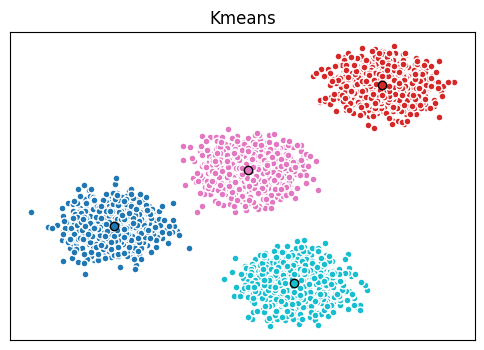

In [53]:

fig = plt.figure(figsize=(6,4))

##　根據聚類的群數，自動從 Matplotlib 的 tab10 調色盤中產生對應數量的顏色，用於繪圖標示不同群。

colors = plt.cm.tab10(np.linspace(0,1,len(set(Predlabels))))

for k, color in zip(range(4), colors):
    
    ## 當前特徵歸類於哪個label的邏輯索引
    my_members = (Predlabels == k)

    cluster_center = censters[k]

    ## 畫資料點對應的顏色
    plt.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=color, marker='.', ms=10)
    ## 劃出中心點
    plt.plot(cluster_center[0], cluster_center[1], 'o' ,markerfacecolor=color,  markeredgecolor='k', markersize=6)

plt.title('Kmeans')
plt.xticks(())
plt.yticks(())
plt.show()

## Customer Segmentation with k-means
使用 k-means 進行客戶細分¶
Imagine that you have a customer dataset, and you need to apply customer segmentation to this historical data. Customer segmentation is the practice of partitioning a customer base into groups of individuals that have similar characteristics. It is a significant strategy as a business can target these specific groups of customers and effectively allocate marketing resources. For example, one group might contain customers who are high-profit and low-risk, or more likely to purchase products, or subscribe to a service. A business task is to retain those customers.
假設您有一個客戶資料集，需要對這些歷史資料進行客戶細分。客戶細分是指將客戶群以相似特徵劃分為不同群體。這是一個重要的策略，因為企業可以鎖定這些特定的客戶群，並有效地分配行銷資源。例如，一個群體可能包含高利潤、低風險的客戶，或更有可能購買產品或訂閱服務的客戶。企業的任務就是留住這些客戶。

In [56]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/Cust_Segmentation.csv")
df

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2
...,...,...,...,...,...,...,...,...,...,...
845,846,27,1,5,26,0.548,1.220,NaN,NBA007,6.8
846,847,28,2,7,34,0.359,2.021,0.0,NBA002,7.0
847,848,25,4,0,18,2.802,3.210,1.0,NBA001,33.4
848,849,32,1,12,28,0.116,0.696,0.0,NBA012,2.9


In [59]:
df_1 = df.drop(columns=['Customer Id', 'Address'])
df_1

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...
845,27,1,5,26,0.548,1.220,NaN,6.8
846,28,2,7,34,0.359,2.021,0.0,7.0
847,25,4,0,18,2.802,3.210,1.0,33.4
848,32,1,12,28,0.116,0.696,0.0,2.9


In [60]:
df_1.dropna(inplace=True)

In [63]:
df_1.describe()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,34.860000,1.722857,8.388571,45.601429,1.553566,3.058196,0.261429,10.260571
std,7.997342,0.928206,6.658039,36.814226,2.117196,3.287550,0.439727,6.827234
min,20.000000,1.000000,0.000000,14.000000,0.012000,0.046000,0.000000,0.400000
25%,29.000000,1.000000,3.000000,24.000000,0.368750,1.044000,0.000000,5.000000
50%,34.000000,1.000000,7.000000,34.000000,0.855000,1.987500,0.000000,8.600000
75%,40.000000,2.000000,12.000000,55.000000,1.901750,3.923250,1.000000,14.125000
max,56.000000,5.000000,31.000000,446.000000,20.561000,27.034000,1.000000,41.300000


In [64]:
X = df_1

dataSet = StandardScaler().fit_transform(X)

In [65]:
kmeans = KMeans(init="k-means++", n_clusters=3, n_init=12)
kmeans.fit(X)
labels = kmeans.labels_
labels

array([0, 2, 2, 0, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0,
       2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 1, 2, 2, 1, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       2, 0, 2, 1, 0, 2, 0, 0, 0, 0, 1, 2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0,
       0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0,
       0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2,
       0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       2, 0, 0, 1, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0,

In [66]:
df_1['label'] = labels

In [67]:
df_1

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,label
0,41,2,6,19,0.124,1.073,0.0,6.3,0
1,47,1,26,100,4.582,8.218,0.0,12.8,2
2,33,2,10,57,6.111,5.802,1.0,20.9,2
3,29,2,4,19,0.681,0.516,0.0,6.3,0
4,47,1,31,253,9.308,8.908,0.0,7.2,1
...,...,...,...,...,...,...,...,...,...
844,41,1,7,43,0.694,1.198,0.0,4.4,0
846,28,2,7,34,0.359,2.021,0.0,7.0,0
847,25,4,0,18,2.802,3.210,1.0,33.4,0
848,32,1,12,28,0.116,0.696,0.0,2.9,0


In [68]:
df_1.groupby('label').mean()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
label,,,,,,,,
0,32.350000,1.642000,5.780000,29.266000,0.930852,1.929790,0.288000,9.957800
1,44.823529,2.823529,19.000000,206.647059,5.656059,11.496588,0.235294,8.435294
2,40.792350,1.841530,14.530055,75.273224,2.873863,5.357377,0.191257,11.257377


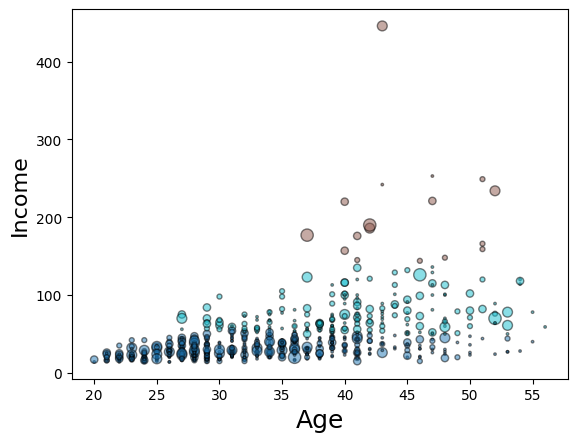

In [72]:
X = X.to_numpy()  # 或 X.values

area = np.pi * (X[:, 1])**2
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(float), cmap='tab10', ec='k', alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)
plt.show()


In [73]:
fig = px.scatter_3d(X, x=1, y=0, z=3, opacity=0.7, color=labels.astype(float))

fig.update_traces(marker=dict(size=5, line=dict(width=.25)), showlegend=False)
fig.update_layout(coloraxis_showscale=False, width=1000, height=800, scene=dict(
        xaxis=dict(title='Education'),
        yaxis=dict(title='Age'),
        zaxis=dict(title='Income')
    ))  # Remove color bar, resize plot

fig.show()